# Harmonic oscillator
The dynamic motion of a pendulum or a mass attached to coil spring under the influence of gravity, can be modelled by an ordinary differential equation (ODE) of second order, known as a harmonic oscillator. This mathematical model is very important in dynamics with many applications in marine engineering. We will see how this model can be used to describe wave induced motions of floating structures. 

## The dynamic equation
If we consider a point mass $m$ attached to a spring with stiffness $k$, we can use *Newton's 2nd law* to obtain the dynamic equation of motion:
$$m\ddot{x}=\sum F$$
The only external forces acting on the mass is the gravity force $F_g=-mg$ and the restoring force from the spring $F_k=-kx$. This yields
$$m\ddot{x}=-kx - mg$$
We have used $x$ to express the vertical position relative to an arbitrary reference position, while $\ddot{x}$ is the vertical acceleration of the mass. At equilibrium, $\ddot{x}=0$ and the spring force balance the gravity force acting on the mass. Then we have $kx_e=-mg$, where $x_e$ is the vertical equilibrium position. Now, let us make the substitution $\eta(t)=x(t)-x_e$, refering to the displacement from equilibrium. Then we obtain the dynamic equation
$$m\ddot{\eta}+k\eta=0$$
which is a homogeneous, ordinary differential equation (ODE) of second order. From the mathematical theory of ordinary differential equations, we know that an ODE with highest derivative of order $n$ has $n$ possible independent solutions. This means that our ODE of second order has two possible independent solutions, being $\eta=A\cos(\omega t)$ and $\eta=B\sin(\omega t)$. The constants $A$ and $B$ must be found from the initial conditions (the position $\eta$ and velocity $\dot{\eta}$ of the mass $m$ at time $t=0$). If we insert the possible solutions into our differential equation, we get
$$-\omega^2m(A\cos(\omega t)+B\sin(\omega t))+k (A\cos(\omega t)+B\sin(\omega t))=0$$
A non-trivial solution (a solution without $A=B=0$), yields the natural frequency $$\omega=\sqrt{k/m}$$
Hence, the general solution to our ODE is
$$\eta(t)=A\cos(\omega t) + B\sin(\omega t)$$

## Initial conditions:
Let us assume the mass has the initial vertical displacement $\eta(0)=x_0$ and velocity $\dot{\eta}(0)=u_0$. We can now determine the constants $A$ and $B$. Considering the initial displacement, we get
$$\eta(0)=A\cos(0) + B\sin(0)=x_0 \qquad \rightarrow \qquad A=x_0$$
The initial velocity yields
$$\dot{\eta}(0)=-\omega A\sin(0) + \omega B\cos(0)=u_0 \qquad \rightarrow \qquad B=u_0/\omega$$

The solution is thus
$$\eta(t)=x_0\cos(\omega t) + \frac{u_0}{\omega}\sin(\omega t)$$
which can  be rewritten in the form
$$\eta(t)=C\cos(\omega t+\delta),$$
where $C=\sqrt{A^2+B^2}=\sqrt{x_0^2+(u_0/\omega)^2}$ is the amplitude of the motion and $\delta=\arctan(B/A)=\arctan(u_0/(\omega x_0))$ is the phase angle relative to the reference time $t$. When computing the phase angle, be aware that $\theta=\arctan(y/x)$ yields a solution $\theta\in[0,\pi]$. To obtain a phase angle $\theta\in[0,2\pi]$ you should use the *atan2(y,x)* function, which takes care of the sign of $x$ and $y$. 

## Example:
Harmonic oscillator

Text(0, 0.5, 'Displacement [m]')

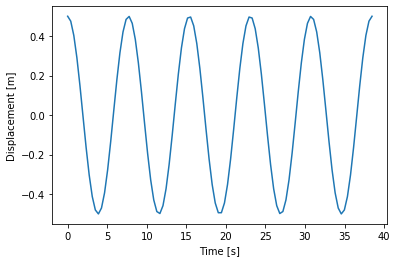

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters:
k = 100. # [N/m]
m = 150.  # [kg]

# Initial conditions:
x_0 = 0.5 # [m]
u_0 = 0. # [m/s]

omega_n = np.sqrt(k/m)
T_n = 2.*np.pi/omega_n
A = x_0
B = u_0/omega_n

C = np.sqrt(A**2 + B**2) # Amplitude of motion
delta = np.arctan2(B, A)   # Phase angle

# Plot solution
tvec = np.linspace(0, 5.0*T_n, 100)

# Below we use the "lambda" keyword in python to create an in-line function eta(t)
eta = lambda t: C*np.cos(omega_n*t - delta)

plt.figure()
plt.plot(tvec, eta(tvec))
plt.xlabel('Time [s]')
plt.ylabel('Displacement [m]')


## Free, damped oscillations
The mass spring system defined above will oscillate forever, as there is no damping in the system. In real physical systems, there are "always" some damping. For the case of a mass in a spring, a damping source could be air resistance or heat generation due to material strains in the spring. For the case of a floating structure oscillating in heave, damping is associated with wave generation due to oscillating structure, where the generated waves radiate outwards from the structure. We remember that propagating waves are associated with transport of energy, meaning that energy is removed from our ship oscillating in heave. With no exciation forces from incoming waves, the heave motion will decay with time and eventually die out. 

Let us assume our mass-spring system also experience a linear damping force $F_b=-b\dot{\eta}$. Newton's 2nd law then yields
$$m\ddot{\eta}=-k\eta-b\dot{\eta}$$
or 
$$m\ddot{\eta}+b\dot{\eta}+k\eta=0$$
Still we obtain a second order ODE, which means there are two independent solutions. We will investigate the analytical solution to our damped mass-spring system. A general solution can be written in the form 
$$\eta(t)=A\exp(\lambda t)$$
Substitution into our equation yields
$$(\lambda^2 m+\lambda b+k)A\exp(\lambda t)=0$$
A non-trivial solution ($A\neq 0$) means 
$$\lambda^2 m+\lambda b+k=0$$
This is called the characteristic polynomial, where the two solutions (roots) $\lambda_1$ and $\lambda_2$ can be found by the *abc*-formula:
$$\lambda_{1,2}=\frac{-b\pm\sqrt{b^2-4mk}}{2m}$$
Hence, the solution is 
$$\eta(t)=A\exp(\lambda_1 t)+B\exp(\lambda_2 t)$$
with $A$ and $B$ being constant coefficients found from initial conditions. Now have a look at the discriminant $\Delta=b^2-4mk$ (expression inside the square-root). The damping value that cause the disciminant to be zero is called the critical damping:
$$b_{crit}=2\sqrt{mk}$$
This damping level represent the boundary between two different solution regimes:
    
   1) Over-critically damped: $b>2\sqrt{mk}$

   2) Critically damped: $b=b_{crit}$

   3) Under-critically damped: $b<2\sqrt{mk}$

If the damping is larger than the critical damping, the solution express a non-oscillatory decay of the initial displacement towards the equilibrium position, given by the exponential function. 

If the damping level is smaller than the critical damping, i.e. if $b<b_crit=2\sqrt{mk}$, we see that the discriminant becomes negative, and square-root of a negative number means trouble in real algebra. This problem can be solved by introduction of *complex numbers*, which is a very useful concept you will learn more about in a later course in engineering mathematics. For now, we will just accept that negative discriminant means that the roots of the characteristic polynomials are complex numbers, and that the solution to the ODE is
$$\eta(t)=\exp(-\alpha t)\left(C_1\cos(\omega_d t)+C_2\sin(\omega_d t)\right)$$
where $C_1$ and $C_2$ are constant coefficients found from initial conditions. We see that the solution is composed of an oscillatory part multiplied by an exponentially decreasing amplitude. Hence, the solution to the under-critically damped problem express oscillations with decreasing amplitude towards equilibrium. The oscillation frequency $\omega_d$ is called the damped natural frequency. By introducing the damping ratio $\xi=b/b_{crit}$, we can rewrite the fraction
$$\frac{b}{2m}=\frac{b\sqrt{k}}{2\sqrt{mk}\sqrt{m}}=\frac{b}{b_{crit}}\sqrt{\frac{k}{m}}=\xi\omega_n$$
The damped natural frequency can then we written as
$$\omega_d=\sqrt{\frac{k}{m}-\xi^2\omega_n^2}=\omega_n\sqrt{1-\xi^2}.$$
where $\omega_n$ is the undamped natural frequency. We see that for small damping ratios $\xi<<1$, the damped natural frequency is approximately equal to the undamped natural frequency $\omega_n=\sqrt{k/m}$. The critical damping can also be expressed as
$$b_{crit}=2\sqrt{k^2m/k}=2k\omega_n$$


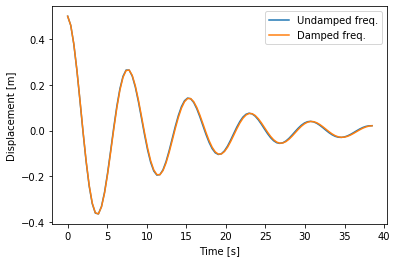

In [21]:
# Damping ratio xi=b/b_crit:
xi = 0.1

# Damped harmonic oscillations (approximate solution using undamped natural frequency):
eta_d1 = lambda t: np.exp(-xi*omega_n*t)*(A*np.cos(omega_n*t)+B*np.sin(omega_n*t))

# Damped harmonic oscillations (exact solution using damped natural frequency):
omega_d = omega_n*np.sqrt(1-xi**2)
eta_d2 = lambda t: np.exp(-xi*omega_n*t)*(A*np.cos(omega_d*t)+B*np.sin(omega_d*t))



plt.figure()
plt.plot(tvec, eta_d1(tvec), label='Undamped freq.')
plt.plot(tvec, eta_d2(tvec), label='Damped freq.')
plt.xlabel('Time [s]')
plt.ylabel('Displacement [m]')
plt.legend()


Try to run the above code block using different damping ratios. What to you see?

# Forced harmonic oscillations
Consider again our mass-spring-damper system, and assume that we also have an external excitation force $F_e(t)$ acting on the mass object. Again, we use Newton's 2nd law to obtain the dynamic equation:
$$m\ddot{\eta} = \sum F = -b\dot{\eta}-k\eta + F_e(t)$$
Assume the excitation force is oscillating harmonically with frequency $\omega$, such that $F_e(t)=F_{e,A}\cos(\omega t)$ 
$$m\ddot{\eta}+b\dot{\eta}+k\eta=F_{e,A}\cos(\omega t)$$
The solution to this problem consists of two parts; the homogeneous solution and a particular solution. 
$$\eta(t)=\eta_h(t)+\eta_p(t)$$
The homogeneous solution is the response of the system due to the initial condition (as described above for free, damped oscillations), without the influence of an external excitation force. The particular solution is the response of the system due to a given excitation force. For a linear system, the response to a harmonically oscillating excitation force is with the same frequency as the excitation. Hence, the particular solution can be written
$$\eta_p(t)=C_1\cos(\omega t)+C_2\sin(\omega t)$$
If we insert into our dynamic equation, we obtain
$$-\omega^2 m(C_1\cos(\omega t)+C_2\sin(\omega t))+\omega b(-C_1\sin(\omega t)+C_2\cos(\omega t))+k(C_1\cos(\omega t)+C_2\sin(\omega t))=F_{e,A}\cos(\omega t)$$
The cosine and sine terms are orthogonal and must balance separately. Collecting cosine terms yields:
$$-\omega^2 m C_1+\omega b C_2+k C_1=F_{e,A}$$
While the sine terms yields:
$$-\omega^2 m C_2-\omega b C_1+k C_2=0, \qquad\rightarrow\quad C_2=C_1\frac{\omega b}{(k-\omega^2m)}$$
Inserting for $C_2$
$$C_1\left( k -\omega^2 m + \frac{(\omega b)^2}{(k-\omega^2m)}\right)=F_{e,A}$$
or
$$C_1\left(\frac{(k -\omega^2 m)^2+(\omega b)^2}{(k-\omega^2m)}\right)=F_{e,A}$$
which means
$$C_1=F_{e,A}\frac{(k-\omega^2m)}{(k -\omega^2 m)^2+(\omega b)^2}$$
$$C_2=F_{e,A}\frac{(\omega b)}{(k -\omega^2 m)^2+(\omega b)^2}$$
The particular solution is thus
$$\eta_p(t)=\frac{F_{e,A}}{(k -\omega^2 m)^2+(\omega b)^2}\left((k-\omega^2m)\cos(\omega t)+(\omega b)\sin(\omega t)\right)$$
As usual, we can rewrite the expression above from $\eta(t)=A\cos(\omega t) + B\sin(\omega t)$ to $\eta(t)=C\cos(\omega t + \delta)$ with $C=\sqrt{A^2+B^2}$ and $\delta=\arctan(B/A)$. We obtain
$$\eta_p(t)=\frac{F_{e,A}}{\sqrt{(k -\omega^2 m)^2+(\omega b)^2}}\cos(\omega t+\delta)$$
where the phase angle is
$$\delta=\frac{\omega b}{k -\omega^2 m}$$